In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-03-14 16:20:51.212813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 16:20:51.294812: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-14 16:20:51.297221: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-14 16:20:51.297230: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
#Download the MNIST Dataset

(X_train, Y_train), (_, _) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train = X_train / 255

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
#Collect all images corresponding to label '0'

X = X_train[Y_train == 9]

In [6]:
X.shape

(5949, 28, 28)

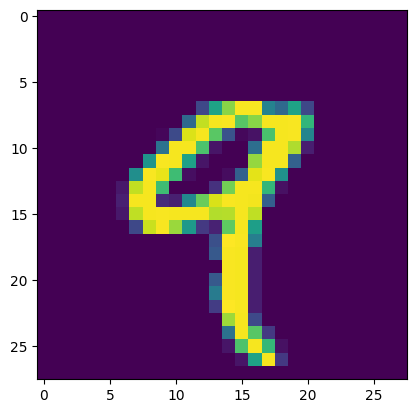

In [7]:
plt.imshow(X[0])

In [8]:
#Flatten all images into 784-element vectors

X = X.reshape(-1, 784)

In [9]:
X.shape

(5949, 784)

In [10]:
#Find the mean vector

mu = np.mean(X, axis = 0)

In [11]:
#Find the covariance matrix

C = np.cov(X.T)

In [12]:
C.max()

0.19194328090088308

In [13]:
#Find the eigenvalues and eignvectors of the covariance matrix(np.linalg.eig() returns eigenvectors 
#sorted in the descending order of eigenvalues)

eig_vals, eig_vecs = np.linalg.eig(C)

In [14]:
x = X[0]

In [15]:
def single_component(x, mu, eigenvec):
    c1 = np.dot((x - mu), eigenvec)
    x_hat = mu + c1*eigenvec
    return x_hat.astype(np.float32)

In [16]:
x_hat = single_component(x, mu, eig_vecs[:, 0])

/tmp/ipykernel_60390/3186284785.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  return x_hat.astype(np.float32)


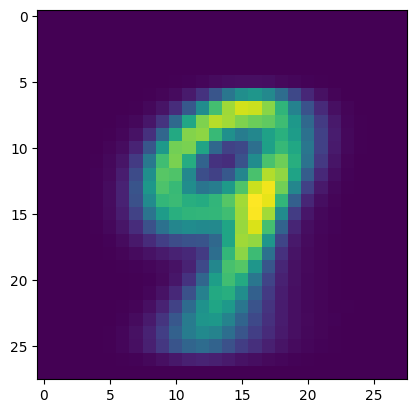

In [17]:
plt.imshow(x_hat.reshape((28, 28)))

In [18]:
def five_components(x, mu, eigenvecs):
    new_x_hat = np.zeros(784)
    for e in eigenvectors:
        c = np.dot((x-mu), e)
        new_x_hat += (mu + c * e).astype(np.float32)
    return new_x_hat

In [19]:
eigenvectors = eig_vecs[:, 0:5].T
new_x_hat = five_components(x, mu, eigenvectors)

/tmp/ipykernel_60390/355862484.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  new_x_hat += (mu + c * e).astype(np.float32)


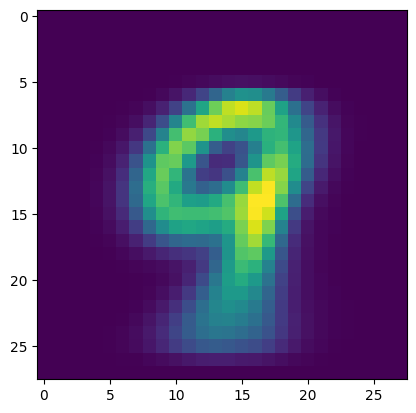

In [20]:
plt.imshow(new_x_hat.reshape((28, 28)))

In [21]:
def plot_nums(x, x_hat, new_x_hat):
    fig = plt.figure(figsize = (15, 5))
    fig.add_subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(x.reshape((28, 28)))
    fig.add_subplot(1, 3, 2)
    plt.title('Reconstructed using one component')
    plt.imshow(x_hat.reshape((28, 28)))
    fig.add_subplot(1, 3, 3)
    plt.title('Reconstructed using five components')
    plt.imshow(new_x_hat.reshape((28, 28)))
    plt.show()

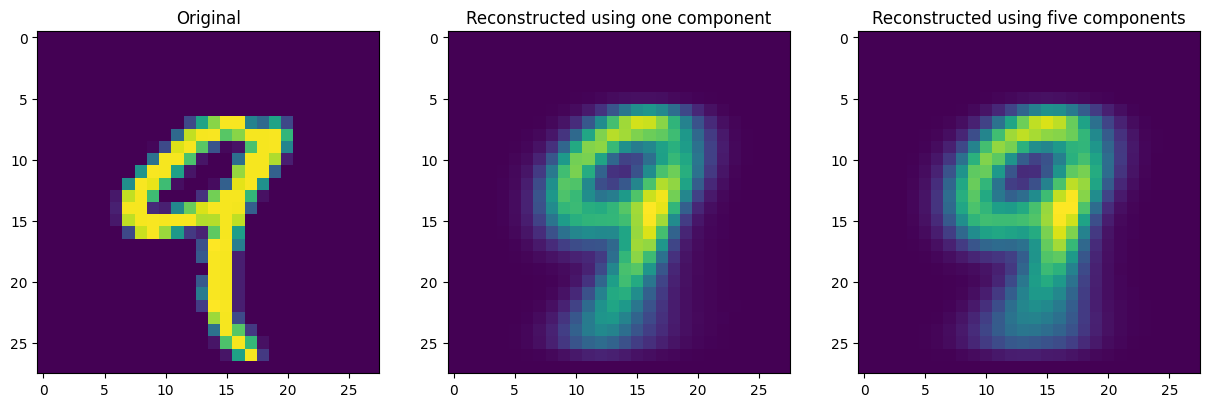

In [22]:
plot_nums(x, x_hat, new_x_hat)

/tmp/ipykernel_60390/3186284785.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  return x_hat.astype(np.float32)
/tmp/ipykernel_60390/355862484.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  new_x_hat += (mu + c * e).astype(np.float32)


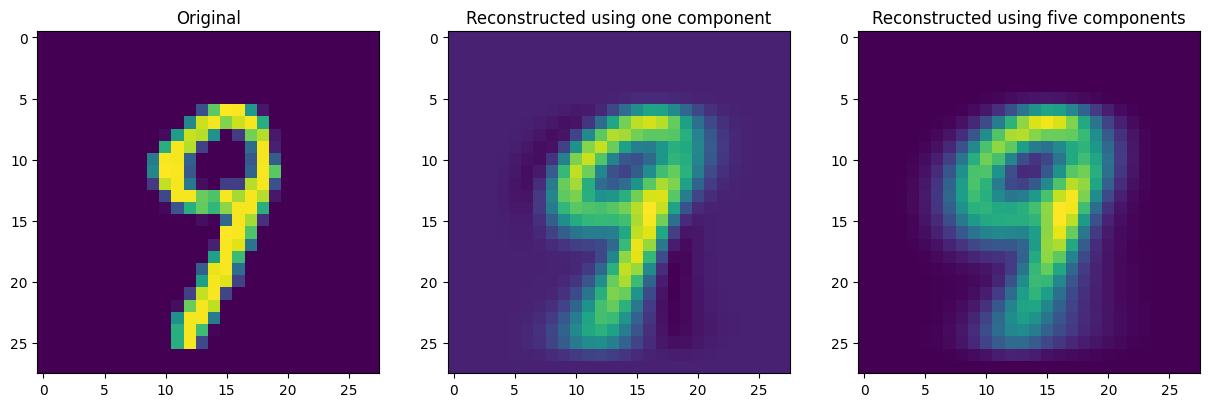

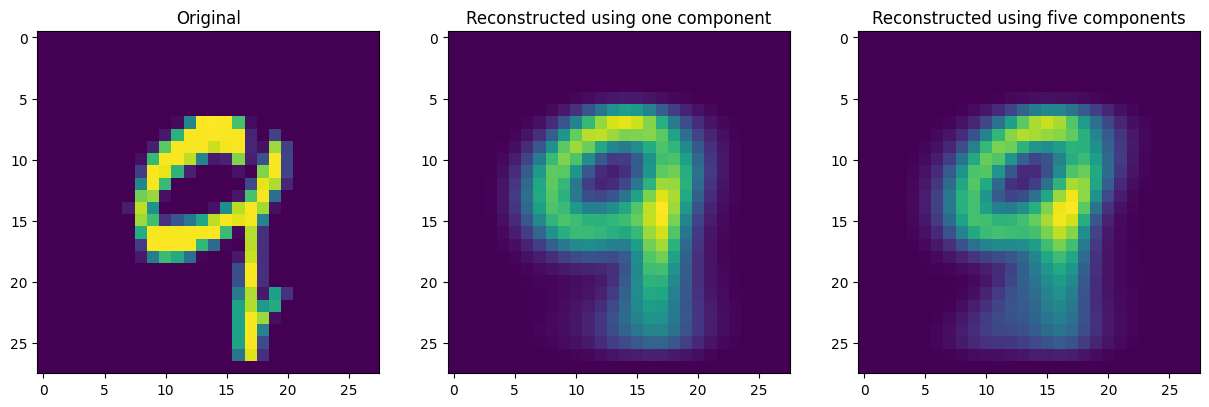

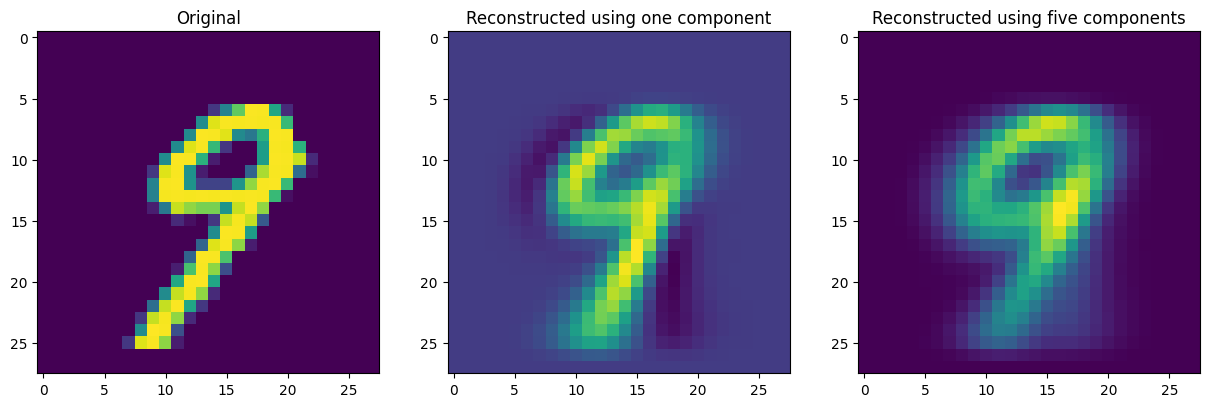

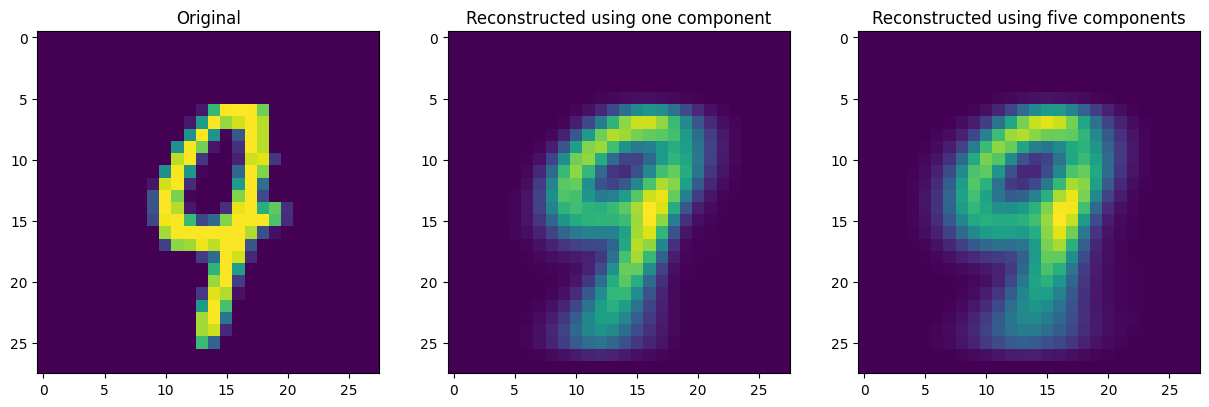

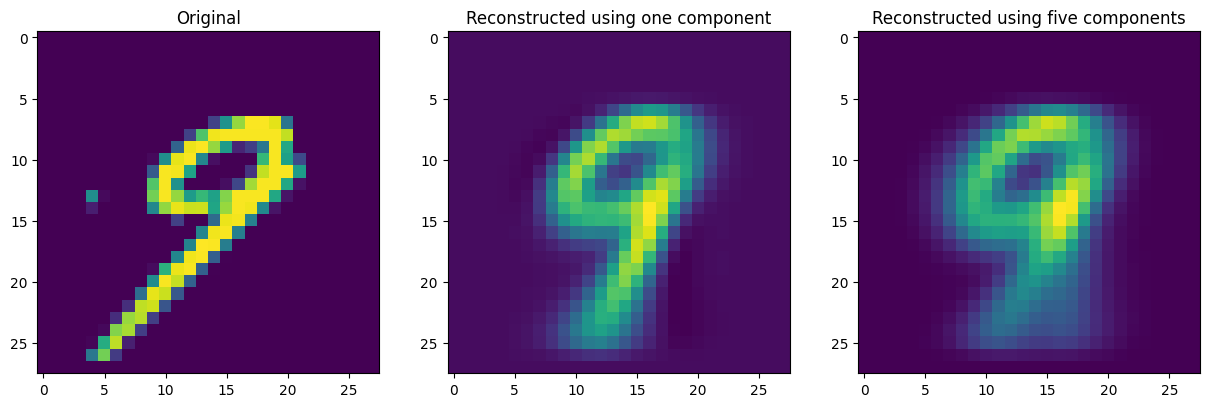

In [24]:
one_eigenvec = eig_vecs[:, 0]
five_eigenvecs = eig_vecs[:, 0:5].T

for x in X[50:55]:
    x_hat = single_component(x, mu, one_eigenvec)
    new_x_hat = five_components(x, mu, five_eigenvecs)
    plot_nums(x, x_hat, new_x_hat)